# Local Field Potentials (LFPs)

#### **Basic instructions:**
#### 1. **To run code windows/blocks:** 

    - you can either hit the play button to the left of the code window 

    - or you can use they keyboard shortcut: select the block and press 'shift-enter'.

#### 2. **The first time** you run this code notebook, you might get a popup asking to choose which version of Python to use (the python "kernel"). **Just hit enter** to choose the base/default version.

#### 3. Make sure you data (.abf) files are in the "data" folder here on the left. You can just copy/paste the files from where they are saved on your computer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
update_plot_defaults()

## 1. Choose the data files you want to analyze

#### Put the .abf files with your recordings in the "data/LFPs" folder

In [5]:
data_folder = "data/8-LFPs"

from glob import glob
data_files = glob(data_folder+"/*.abf")
print(data_folder)
data_files

data/8-LFPs


['data/8-LFPs/picro_100uA.abf',
 'data/8-LFPs/no_picro_50uA.abf',
 'data/8-LFPs/no_picro_200uA.abf',
 'data/8-LFPs/50uA.abf',
 'data/8-LFPs/100uA.abf',
 'data/8-LFPs/no_picro_100uA.abf',
 'data/8-LFPs/picro_50uA.abf',
 'data/8-LFPs/picro_200uA.abf',
 'data/8-LFPs/200uA.abf',
 'data/8-LFPs/250uA.abf',
 'data/8-LFPs/picro_250uA.abf',
 'data/8-LFPs/no_picro_150uA.abf',
 'data/8-LFPs/150uA.abf',
 'data/8-LFPs/no_picro_250uA.abf',
 'data/8-LFPs/picro_150uA.abf']

Choose which file you want to analyze (copy name from above) and paste the file name here:

You will also need to enter the stimulus currents you used for each recording, since they are not recorded by your acquisition setup

In [8]:
# data_files = ['data/8-LFPs/50uA.abf',
#             'data/8-LFPs/100uA.abf',
#             'data/8-LFPs/150uA.abf',
#             'data/8-LFPs/200uA.abf',
#             'data/8-LFPs/250uA.abf']

# data_files = ['data/8-LFPs/no_picro_50uA.abf',
#             'data/8-LFPs/no_picro_100uA.abf',
#             'data/8-LFPs/no_picro_150uA.abf',
#             'data/8-LFPs/no_picro_200uA.abf',
#             'data/8-LFPs/no_picro_250uA.abf']

data_files = ['data/8-LFPs/with_picro_50uA.abf',
            'data/8-LFPs/with_picro_100uA.abf',
            'data/8-LFPs/with_picro_150uA.abf',
            'data/8-LFPs/with_picro_200uA.abf',
            'data/8-LFPs/with_picro_250uA.abf']

stim_amplitudes = [50,100,150,200,250]

Let's start by loading just one file and plot the raw data:

In [9]:
data_file = data_files[-1]

traces = Trace.from_axon_file(filename=data_file, 
                              recording_mode="I clamp",
                              load_ttl=False,
                              units=['pA','mV'])
print(traces)

time_units = 'ms' # specify seconds (s), or milliseconds (ms)

# ----------------------------------------------------------------------------------------------------------------
%matplotlib inline
ax1 = traces.plot(plot_current=False, plot_voltage=True, sweep='all', time_units=time_units, plot_mean=True, height_ratios=(1,3))
# ax1.set_ylim(-30,-20)
plt.show()

ValueError: ABF file does not exist: /Users/ag1880/github-repos/CSHL_IonChannels2025/CSHL_IonChannels2025/data/8-LFPs/with_picro_250uA.abf

Now let's get the average trace for each recording (with different stimulation current) and combine them into a single object

Trace('averaged_traces')
Number of sweeps: 5
Points per sweep: 10,000
Duration per sweep: 1.000 s
Sampling rate: 10000 Hz
Sampling interval: 0.100 ms
Available channels: Current, Voltage


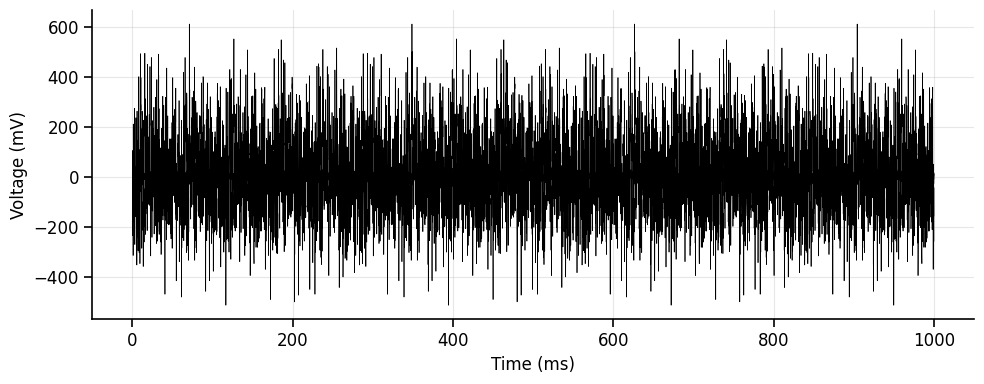

In [110]:
# Lists to store averaged traces
averaged_current_traces = []
averaged_voltage_traces = []

# Loop through each file
for filename in data_files:    
    trace = Trace.from_axon_file(filename=filename, 
                                load_voltage=True,
                                recording_mode="I clamp",
                                load_ttl=False,
                                units=['pA', 'mV'])

    # Average across sweeps
    avg_current = np.mean(trace.current_data, axis=0)[0:10000]
    avg_voltage = np.mean(trace.voltage_data, axis=0)[0:10000]
    averaged_current_traces.append(avg_current)
    averaged_voltage_traces.append(avg_voltage)

# Stack averaged traces into a 2D array and create a new Trace object
combined_current = np.stack(averaged_current_traces, axis=0)
combined_voltage = np.stack(averaged_voltage_traces, axis=0)

traces = Trace(current_data=combined_current,
                sampling_interval=trace.sampling,
                current_unit=trace.current_unit,
                filename='averaged_traces',
                voltage_data=combined_voltage,
                voltage_unit=trace.voltage_unit)
print(traces)

time_units = 'ms' # specify seconds (s), or milliseconds (ms)

# ----------------------------------------------------------------------------------------------------------------
traces.plot(plot_voltage=True, plot_current=False, sweep='all', time_units=time_units)
# ax1, ax2 = traces.plot(plot_voltage=True, sweep='all')
plt.show()

## 2. Signal processing

### Optional: apply baseline correction

If your baseline current is not zero, you may need to correct for that to get accurate measurements.

Uncomment this cell block (highlight everything, then cmd+/ on macOS or ctrl+/ on Windows) to run it.

In [99]:
# Change this to True if you want to subtract the baseline from the sweeps.
subtract_baseline = True
baseline_start = 0
baseline_end = 0.1

BASELINE SUBTRACTED:
Baseline voltages: [0. 0. 0. 0. 0.]


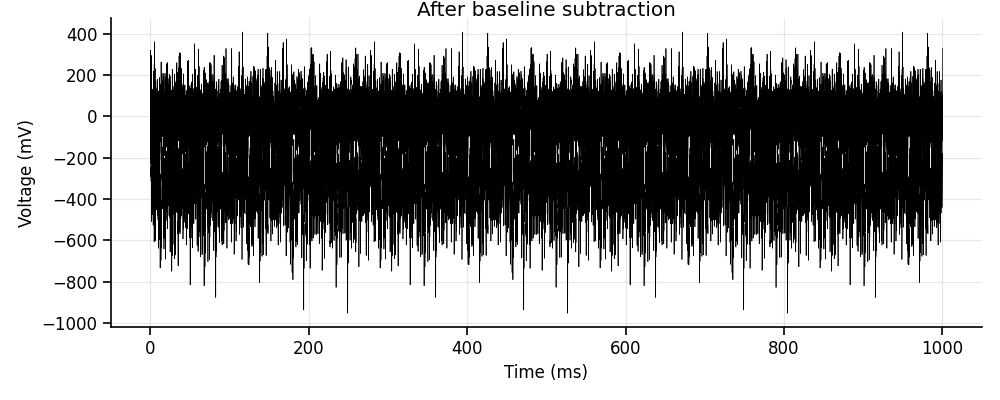

In [106]:
if subtract_baseline:
    traces.subtract_baseline(start_time = baseline_start,
                             end_time = baseline_end, 
                             time_units = time_units,  # specify seconds (s), or milliseconds (ms)
                             channel = 'voltage')  # Options: 'current', 'voltage', 'all'
    %matplotlib widget
    ax1 = traces.plot(plot_voltage=True, plot_current=False, plot_ttl=False, time_units='ms', sweep='all')
    ax1.set_title('After baseline subtraction', y=0.98)
    plt.show()
else:
    print("BASELINE NOT SUBTRACTED")


### Optional: apply additional highpass/lowpass filtering

Depending in you recording, you may have 50/60 Hz line noise, high-frequency noise, or drift in your recordings.

The goal here is to only remove the noise with minimal distortion of the data, so be careful not to overdo it

In [101]:
# Change this to True if you want to subtract the baseline from the sweeps.
additional_filtering = False

In [102]:
if additional_filtering:
    filtered_traces = traces

    # Step 1: Detrend the data to remove linear or constant trends.
    filtered_traces = filtered_traces.detrend(detrend_type='linear', num_segments=1)

    # Step 2: Apply a highpass filter to remove low-frequency noise + lowpass to remove high-frequency noise
    filtered_traces = filtered_traces.filter(
        line_freq=60,    # Frequency (Hz) of electrical noise to remove: 50 Hz (in Europe) or 60 Hz (in the US).
        width=0.01,         # Width (Hz) controls the width of frequency bands around the line frequency the filter cuts out.
        highpass=None,   # Removes low-frequency drift. Set a value in Hz (e.g. 1 for 1 Hz).
        lowpass=4000,    # Removes high-frequency noise. Set a value in Hz (e.g. 100 for 100 Hz).
        order=4)         # Controls sharpness of the filter. Higher = sharper cutoff.

    %matplotlib widget
    ax = filtered_traces.plot(plot_voltage=True, plot_current=False)
    ax.set_title('After filtering', y=0.98)
    plt.show()

Once you are happy with the filter setting, run the next cell to implement them:

In [103]:
if additional_filtering:
    traces=filtered_traces

## 3. Measure the fiber volley amplitude

In [104]:
# Choose setting to automatically detect the stimulus artifact (capacitive transient)
stim_times = traces.get_event_times(threshold=-20, 
                                    polarity='negative', 
                                    time_units=time_units, 
                                    channel='voltage', sweep=0)
# traces.get_ttl_events(threshold=0.5, edge='rising', time_units='ms')
print(f"Stim times: {stim_times} ms")

# Crop the trace after the stim
cropped_traces = traces.crop(timepoint=stim_times[0], window=200, time_units=time_units)

Stim times: [  0.6   1.3   1.9 ... 998.9 999.2 999.4] ms


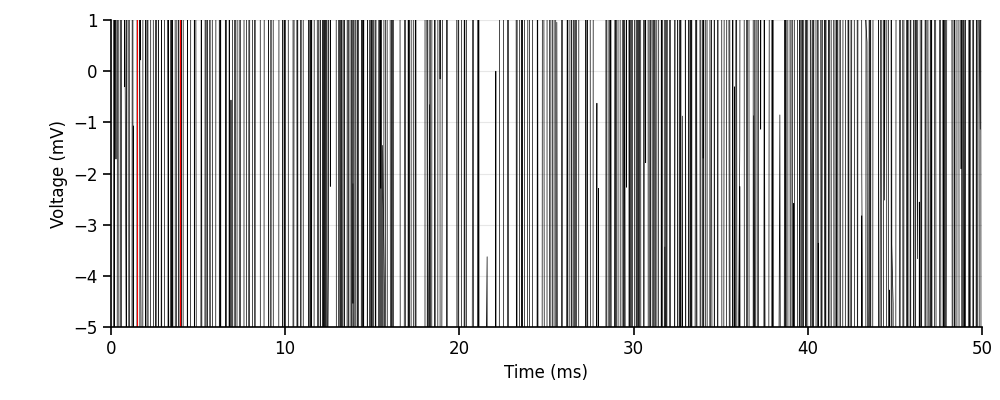

In [105]:
# The start/end time just helps to zoom in on the traces.
start_time = 0
end_time = 50
ylim = (-5,1)

# The markers are important: the will define the window where we actually exctract peak current values from. Set them carefully.
marker_1 = 1.5
marker_2 = 4

# ----------------------------------------------------------------------------------------------------------------------
%matplotlib widget
ax = cropped_traces.plot(plot_voltage=True, plot_current=False, time_units=time_units, sweep='all', marker_1=marker_1, marker_2=marker_2)
ax.set_xlim(start_time,end_time)
ax.set_ylim(ylim)
plt.show()

In [85]:
measurement_type = 'min' # Options: 'mean', 'max', 'min', 'peak'

_, fiber_volley_amplitudes = cropped_traces.get_measurements(start_time=marker_1,
                                                            end_time=marker_2,
                                                            measurement_type=measurement_type,
                                                            time_units=time_units, sweep='all')
fiber_volley_amplitudes = np.abs(fiber_volley_amplitudes)
print(f"Fiber volley amplitudes: {fiber_volley_amplitudes}")

Fiber volley amplitudes: [0.9221 1.709  3.1557 3.7277 0.7272]


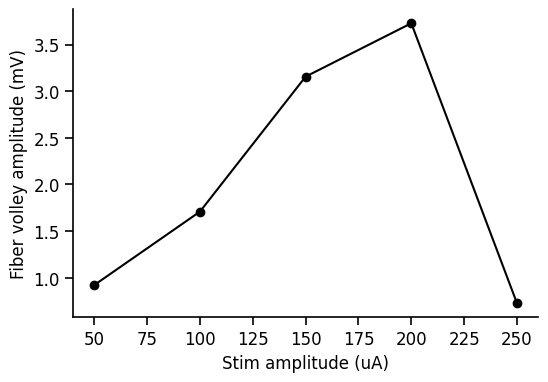

In [86]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(stim_amplitudes, fiber_volley_amplitudes, 'o-', color='k')
ax.set_xlabel('Stim amplitude (uA)')
ax.set_ylabel('Fiber volley amplitude (mV)')
plt.show()

## 3. Measure the field EPSP

### 3.4. Fit line to get the slope of the fEPSP

First let's define the relevant time window where we want to fit, so we can fit a line to the rising phase

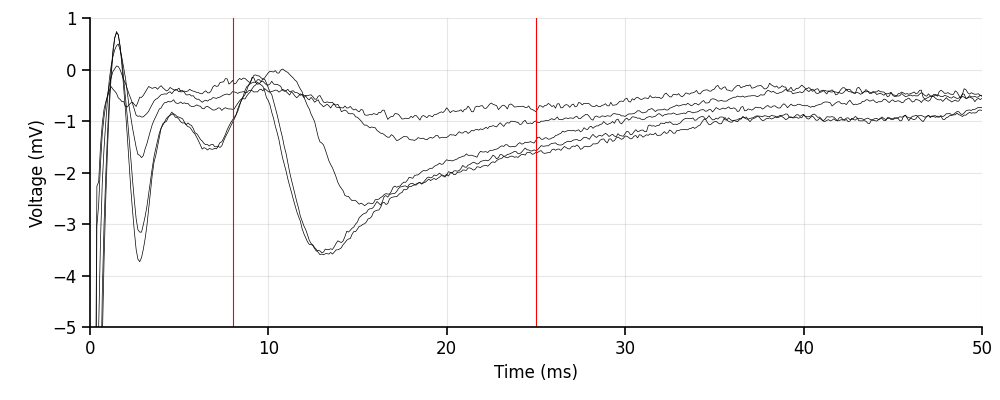

In [87]:
# The start/end time just helps to zoom in on the traces.
start_time = 0
end_time = 50
ylim = (-5,1)

# The markers are important: the will define the window where we actually exctract peak current values from. Set them carefully.
marker_3 = 8
marker_4 = 25

# ----------------------------------------------------------------------------------------------------------------------
%matplotlib widget
ax = cropped_traces.plot(plot_voltage=True, plot_current=False, time_units=time_units, marker_1=marker_3, marker_2=marker_4, sweep='all')
ax.set_xlim(start_time,end_time)
ax.set_ylim(ylim)
plt.show()

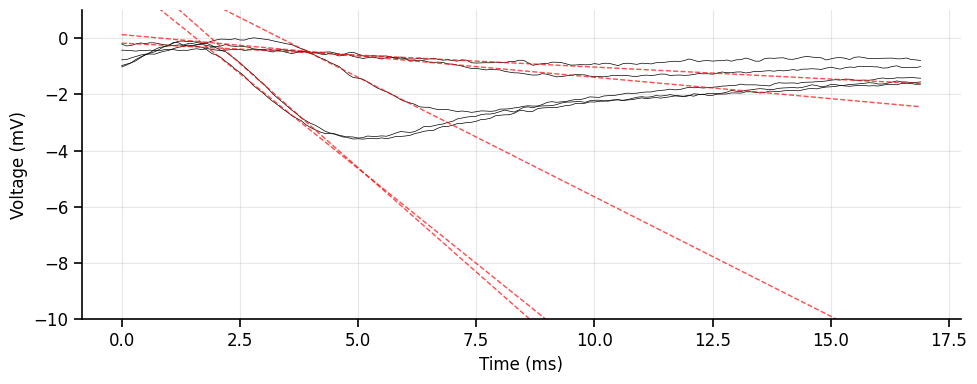

In [88]:
fEPSP_crop = cropped_traces.crop(timepoint=marker_3, timepoint_2=marker_4, time_units=time_units)

%matplotlib inline
ax = fEPSP_crop.plot(plot_voltage=True, plot_current=False, time_units=time_units, sweep='all')

fEPSP_start = np.argmax(fEPSP_crop.voltage_data, axis=1)
fEPSP_end = np.argmin(fEPSP_crop.voltage_data, axis=1)

slopes = []
for i in range(fEPSP_crop.num_sweeps):
    trace = fEPSP_crop.voltage_data[i]
    
    # Get peak indices and values for this trace
    peak_start_idx = fEPSP_start[i]
    peak_end_idx = fEPSP_end[i]
    peak_start_val = trace[peak_start_idx]  # Upper peak value
    peak_end_val = trace[peak_end_idx]      # Lower peak value
    
    # # Calculate 20% and 80% amplitude thresholds
    # amplitude_range = peak_start_val - peak_end_val
    # threshold_20 = peak_start_val - 0.2 * amplitude_range
    # threshold_80 = peak_start_val - 0.8 * amplitude_range
    
    # # Find indices where voltage crosses these thresholds
    # fit_start_idx = np.where(trace <= threshold_20)[0][0]
    # fit_end_idx = np.where(trace <= threshold_80)[0][0]
    
    fit_start_idx = peak_start_idx + 10
    fit_end_idx = peak_end_idx - 10

    # Extract time and voltage for fitting region
    time_fit = fEPSP_crop.time_ms[fit_start_idx:fit_end_idx]
    voltage_fit = trace[fit_start_idx:fit_end_idx]
    
    # Fit linear regression
    from scipy.stats import linregress
    slope, intercept, r_value, p_value, std_err = linregress(time_fit, voltage_fit)
    slopes.append(slope)
    
    # Plot fitted line on original time scale
    fit_line = slope * fEPSP_crop.time_ms + intercept
    ax.plot(fEPSP_crop.time_ms, fit_line, linestyle='--', color='r', alpha=0.7, linewidth=1)

slopes = np.array(slopes)
ax.set_ylim(-10,1)
plt.show()



## 4. Make summary plots

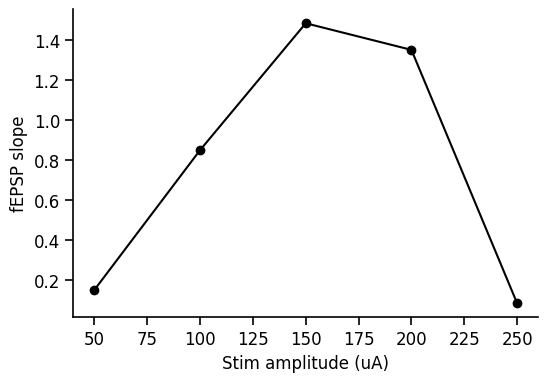

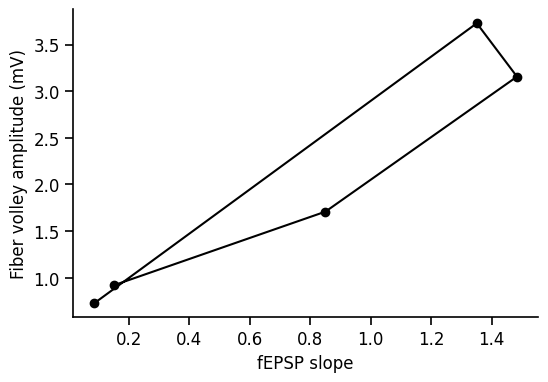

In [89]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(stim_amplitudes, -slopes, 'o-', color='k')
ax.set_xlabel('Stim amplitude (uA)')
ax.set_ylabel('fEPSP slope')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.abs(slopes), fiber_volley_amplitudes, '-o', color='k')
ax.set_ylabel('Fiber volley amplitude (mV)')
ax.set_xlabel('fEPSP slope')
plt.show()